<a href="https://colab.research.google.com/github/AstxMargaryan/ML/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold,cross_val_score
from sklearn.model_selection import train_test_split
from  sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

### Load the dataset from the file Ecommerce.csv

```
This dataset includes the following data for 200 online customers:

- Email
- Adress
- Avatar
- Avg Session Length (everage time they spent on usage)
- Time on App (time they spent using the application)
- Time on Website (time they spent using the website)
- Length of Membership (for how long they have been a user)
- Yearly Amount Spent (how much money they spend yearly)

Yout goal will be to estimate the value of the Yearly Amount Spent using the feature(s) of the users
```

In [2]:
df = pd.read_csv("/content/Ecommerce.csv")

In [3]:
df.head(5)

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.shape

(500, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg Session Length    500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


In [7]:
df.isnull().sum()

,0
Email,0
Address,0
Avatar,0
Avg Session Length,0
Time on App,0
Time on Website,0
Length of Membership,0
Yearly Amount Spent,0


### Get rid of non-numerical columns of the dataset

In [8]:
df = df.drop(["Email","Address","Avatar"], axis =1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg Session Length    500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


<Axes: >

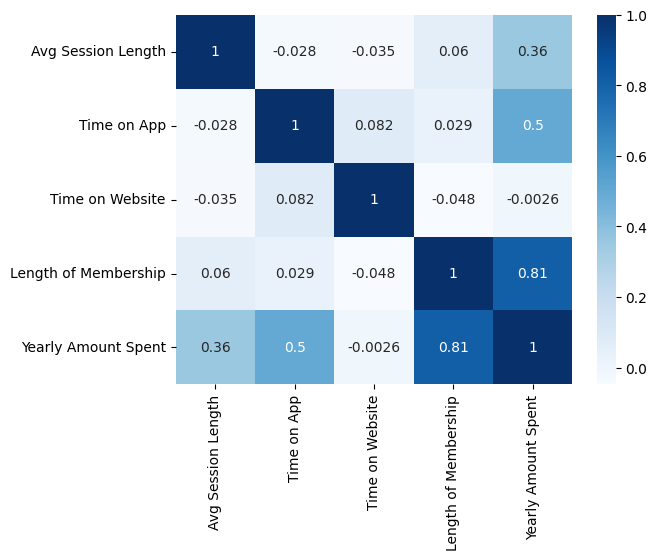

In [10]:
corr = df.corr()
sns.heatmap(corr, cmap ="Blues", annot=True)

### Use Yearly Amount Spent as your target variable. Plot the relationship of each of the numerical features with the target variable

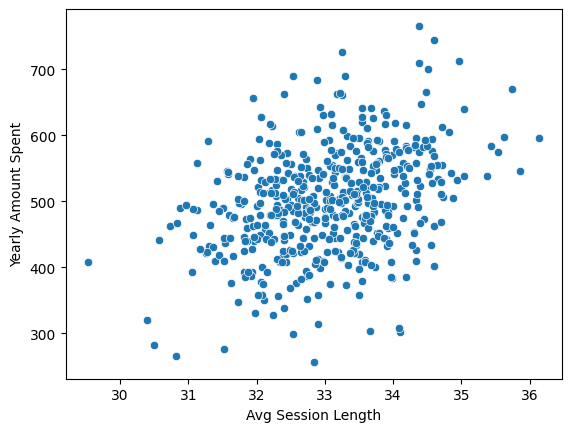

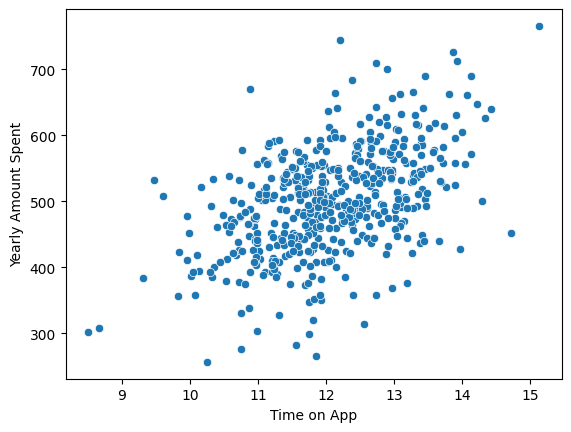

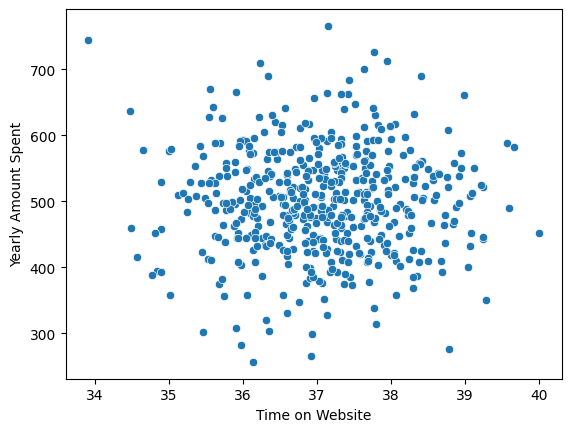

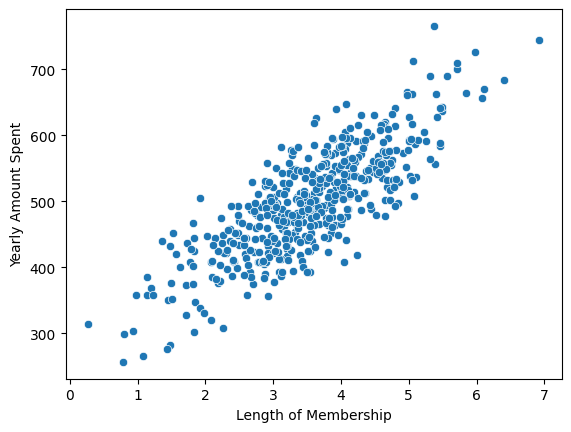

In [11]:
for column in df.columns:
  if column != "Yearly Amount Spent":
    plt.figure()
    sns.scatterplot(x = column, y= "Yearly Amount Spent", data = df)

### Leave only one feature that has a linear relationship with the target variable.

In [12]:
df_linear = df[["Length of Membership", "Yearly Amount Spent"]]

In [13]:
df_linear

,Length of Membership,Yearly Amount Spent
0,4.082621,587.951054
1,2.664034,392.204933
2,4.104543,487.547505
3,3.120179,581.852344
4,4.446308,599.406092
...,...,...
495,3.746573,573.847438
496,3.576526,529.049004
497,4.958264,551.620145
498,2.336485,456.469510


### Divide the dataset into training and test sets with the ratio 80:20.

In [14]:
x = df_linear["Length of Membership"]
x

,Length of Membership
0,4.082621
1,2.664034
2,4.104543
3,3.120179
4,4.446308
...,...
495,3.746573
496,3.576526
497,4.958264
498,2.336485


In [15]:
y = df_linear["Yearly Amount Spent"]
y

,Yearly Amount Spent
0,587.951054
1,392.204933
2,487.547505
3,581.852344
4,599.406092
...,...
495,573.847438
496,529.049004
497,551.620145
498,456.469510


In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Use the resulting train and test sets with the next 2 functions to fit linear regression and plot the resulting regression line.

The first function is `fit_1d_linear_regression` that takes two vectors $x$ and $y$, and returns a numpy array ($\beta_0, \beta_1)$, where $\beta_0$ is the intercept of the line, and $\beta_1$ is the slope.

In [17]:
def fit_1d_linear_regression(data_vector, response_vector):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    Note: You can avoid the intercept for simplicity
    """
    x = data_vector.to_numpy()
    y = response_vector.to_numpy()

    if x.size == 0:
      raise ValueError("data_vector must not be empty")

    if x.shape[0] != y.shape[0]:
      raise ValueError("data_vector and response_vector must have the same length")

    x_mean = x.mean()
    y_mean = y.mean()

    beta_1 = np.sum((x-x_mean)* (y-y_mean))/ np.sum((x-x_mean) **2)
    beta_0 = y_mean - beta_1 * x_mean

    return np.array([beta_0, beta_1])

The second function is `plot_line` function, that takes $\beta_0, \beta_1, x, y$ and plots a scatter plot of the data, and the line $y = \beta_0 + \beta_1 x$. And saves the plot in `YOURNAME.png`

In [18]:
def plot_fitted_line(b0: float,
                     b1: float,
                     x,
                     y,
                     username: str):
    """
    :param b0: Intersept of line to plot
    Note: avoid this if you don't have an intercept in the previous function
    :param b1: Slope of the line to plot
    :param x: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x coordinates)
    :param y: A pandas series object (i.e. a column of a dataframe),
                        where each element is a label (y coordinates)
    """
    x = np.array(x)
    y = np.array(y)

    sns.scatterplot(x=x, y=y, color ="blue")

    x_line = np.linspace(x.min(), x.max(), 250)
    y_line = b0 + b1 * x_line

    sns.lineplot(x= x_line, y=y_line, color ="orange", label="Fitted line")

    plt.xlabel("Length of Membership")
    plt.ylabel("Yearly Amount Spent")
    plt.title("Linear Regression")

    plt.savefig(f"{username}.png", dpi=300, bbox_inches="tight")
    plt.show()

### Now fit the linear regression to the data containing only 1 feature using sklearn and compare the results with your own fit_1d_linear_regression function

In [19]:
model = LinearRegression()

In [20]:
model.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression()

In [21]:
y_predicted_sk = model.predict(X_test.values.reshape(-1, 1))
y_predicted_sk

array([493.36239897, 520.31855413, 545.31600502, 461.48520003,
       492.99396212, 515.23721032, 485.32056439, 519.19322598,
       451.02061187, 518.66711703, 478.38181964, 437.25997065,
       426.42887189, 555.55213423, 463.1107777 , 451.30776963,
       513.53096689, 469.30389796, 435.0236958 , 515.80181189,
       475.81469361, 494.17254457, 470.85326474, 581.25694008,
       454.79704458, 532.13523835, 591.85482738, 528.26564599,
       457.33621854, 399.14605254, 549.43359953, 499.7166409 ,
       500.76216078, 323.16216962, 536.67019854, 478.63718851,
       552.52222761, 439.56421366, 477.91768464, 492.07791614,
       501.5494264 , 359.43550249, 494.16768989, 505.37287005,
       453.64348186, 560.31162899, 535.25312145, 511.37432943,
       363.71143202, 416.47869176, 491.22685953, 463.48003411,
       589.40198982, 567.03453121, 553.78842215, 490.61459784,
       389.37748159, 369.383711  , 564.92775134, 558.48695174,
       450.33098111, 412.39790936, 531.17108091, 459.14

In [54]:
b0_sk = model.intercept_
b1_sk = model.coef_[0]

In [55]:
print(f"Sklearn LinearRegression:beta0 = {b0_sk} , beta1 = {b1_sk}")

Sklearn LinearRegression:beta0 = 271.3521128033932 , beta1 = 64.64010065386708


In [24]:
b0_my, b1_my = fit_1d_linear_regression(X_train, y_train)

In [25]:
y_predicted_my = b0_my + b1_my * X_test
y_predicted_my

,Length of Membership
361,493.362399
73,520.318554
374,545.316005
155,461.485200
104,492.993962
...,...
347,603.461104
86,443.937408
75,473.066002
438,499.860585


In [26]:
print(f"My LinearRegression:beta0 = {b0_my} , beta1 ={b1_my}")

My LinearRegression:beta0 = 271.35211280339325 , beta1 =64.64010065386707


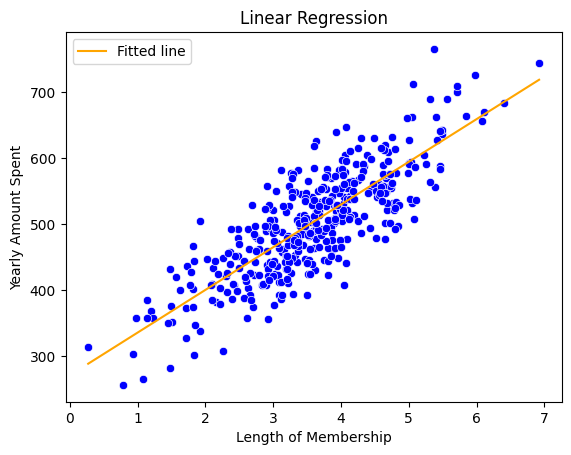

In [27]:
plot_fitted_line(b0_my, b1_my, X_train, y_train,"Astghik_Margaryan")

### Use sklearn.metrics to calculate Mean absolute error, Mean squared error, Root mean squared error and R-squared for the results of your own function vs the sklearn regression results. Try to interprete your results.

In [28]:
MAE_my = mean_absolute_error(y_test, y_predicted_my)
MSE_my = mean_squared_error(y_test, y_predicted_my)
RMSE_my = root_mean_squared_error(y_test, y_predicted_my)
R2_my = r2_score(y_test, y_predicted_my)

In [29]:
print(f'Metrics for custom linear regression: MAE = {MAE_my:.3f}, MSE = {MSE_my:.3f}, RMSE = {RMSE_my:.3f}, R2 = {R2_my:.3f}')

Metrics for custom linear regression: MAE = 37.836, MSE = 2162.112, RMSE = 46.499, R2 = 0.563


In [30]:
MAE_sk = mean_absolute_error(y_test, y_predicted_sk)
MSE_sk = mean_squared_error(y_test, y_predicted_sk)
RMSE_sk = root_mean_squared_error(y_test, y_predicted_sk)
R2_sk = r2_score(y_test, y_predicted_sk)

In [31]:
print(f'Metrics for sklearn linear regression: MAE = {MAE_sk:.3f}, MSE = {MSE_sk:.3f}, RMSE = {RMSE_sk:.3f}, R2 = {R2_sk:.3f}')

Metrics for sklearn linear regression: MAE = 37.836, MSE = 2162.112, RMSE = 46.499, R2 = 0.563


### Fit linear regression to the data containing all numerical features using sklearn and use the same metrics to evaluate how good the model is.

In [32]:
model_1 = LinearRegression()

In [33]:
x = df.drop("Yearly Amount Spent", axis=1)
y = df["Yearly Amount Spent"]

In [34]:
x

,Avg Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [35]:
y

,Yearly Amount Spent
0,587.951054
1,392.204933
2,487.547505
3,581.852344
4,599.406092
...,...
495,573.847438
496,529.049004
497,551.620145
498,456.469510


In [36]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
model_1.fit(X_train_1,y_train_1)

LinearRegression()

In [38]:
y_predicted_sk_1 = model_1.predict(X_test_1)

In [39]:
MAE_sk_1 = mean_absolute_error(y_test_1, y_predicted_sk_1)
MSE_sk_1 = mean_squared_error(y_test_1, y_predicted_sk_1)
RMSE_sk_1 = root_mean_squared_error(y_test_1, y_predicted_sk_1)
R2_sk_1 = r2_score(y_test_1, y_predicted_sk_1)

In [40]:
print(f'Metrics for sklearn linear regression using all numerical features: MAE = {MAE_sk_1:.2f}, MSE = {MSE_sk_1:.2f}, RMSE = {RMSE_sk_1:.2f}, R2 = {R2_sk_1:.2f}')

Metrics for sklearn linear regression using all numerical features: MAE = 8.56, MSE = 109.86, RMSE = 10.48, R2 = 0.98


### Evaluate model with K-fold cross-validation.

In [41]:
model_2 =LinearRegression()

kf = KFold(n_splits = 10, shuffle = True, random_state=42)

scores = cross_val_score(model_2, X_train_1, y_train_1, cv=kf, scoring='neg_mean_squared_error')

mse_scores = -scores
print("MSE for each fold:", mse_scores)
print("Average MSE:", mse_scores.mean())

MSE for each fold: [111.90700645 143.27060956  85.27755185  82.44777422 128.76775988
  87.07168596  62.60786182  74.85734514 122.82307574  91.21371159]
Average MSE: 99.0244382202858


### Implement Ridge Regression, fit the model and evaluate.

In [42]:
def fit_1d_ridge_regression(data_vector, response_vector, lmb=1):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    Note: You can avoid the intercept for simplicity
    """

    x = data_vector.to_numpy().reshape(-1,1)
    y = response_vector.to_numpy()

    if x.size == 0:
      raise ValueError("data_vector must not be empty")

    if x.shape[0] != y.shape[0]:
      raise ValueError("data_vector and response_vector must have the same length")

    I = np.eye(x.shape[1])
    b_ridge = np.linalg.inv(x.T @ x + lmb*I) @ x.T @ y

    return b_ridge

In [43]:
my_ridge = fit_1d_ridge_regression(X_train, y_train)

In [44]:
print(f'Custom Ridge regression  = {my_ridge[0]:.3f}')

Custom Ridge regression  = 134.852


In [45]:
ridge_sk = Ridge(fit_intercept=False)
ridge_sk.fit(X_train.values.reshape(-1,1), y_train)

Ridge(fit_intercept=False)

In [46]:
sk_slope_ridge = ridge_sk.coef_

In [47]:
print(f'Sklearn Ridge regression = {sk_slope_ridge[0]:.3f}')

Sklearn Ridge regression = 134.852


### Implement Lasso regression, fit the model and evaluate.

NOTE: In 1-D, LASSO has a closed form: it takes the ordinary least-squares solution and shrinks it towards zero. If the shrinkage is large enough, it becomes exactly zero.

In [48]:
def fit_1d_lasso_regression(data_vector, response_vector, lmb=1):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    Note: You can avoid the intercept for simplicity
    """
    x = data_vector.to_numpy().reshape(-1,1)
    y = response_vector.to_numpy()

    if x.size == 0:
      raise ValueError("data_vector must not be empty")

    if x.shape[0] != y.shape[0]:
      raise ValueError("data_vector and response_vector must have the same length")


    a = (x.T @ x).item()
    c = (x.T @ y).item()

    beta_lasso = np.sign(c)* max(0, (abs(c)-lmb)) / a

    return np.array([beta_lasso])

In [49]:
my_lasso = fit_1d_lasso_regression(X_train, y_train)

In [50]:
print(f'Custom Lasso regression  = {my_lasso[0]:.3f}')

Custom Lasso regression  = 134.876


In [51]:
l =  Lasso(fit_intercept=False)
l.fit(X_train.values.reshape(-1,1), y_train)

Lasso(fit_intercept=False)

In [52]:
sk_slope_lasso  = l.coef_

In [53]:
print(f'Sklearn Lasso regression = {sk_slope_lasso[0]:.3f}')

Sklearn Lasso regression = 134.804
